In [75]:
from oai_key import oai_key
from openai import OpenAI
from datetime import datetime
import pandas as pd


client = OpenAI(api_key=oai_key)

In [76]:
responses = []

for i in range(100):
    response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {"role": "user", "content": """Alice has N brothers and she also has M sisters. How many sisters does Alice’s brother have?
         Write the final answer in the format Final Answer:<answer in terms of M and/or N>"""},
      ]
    )
    responses.append(response)
    if i % 10 == 0:
        print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} Completed {i+1} requests")

2024-06-20 23:26:49 Completed 1 requests
2024-06-20 23:27:12 Completed 11 requests
2024-06-20 23:27:32 Completed 21 requests
2024-06-20 23:27:52 Completed 31 requests
2024-06-20 23:28:15 Completed 41 requests
2024-06-20 23:28:41 Completed 51 requests
2024-06-20 23:29:01 Completed 61 requests
2024-06-20 23:29:25 Completed 71 requests
2024-06-20 23:29:49 Completed 81 requests
2024-06-20 23:30:12 Completed 91 requests


In [87]:
cot_responses = []

for i in range(100):
    cot_response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {"role": "user", "content": """Think step by step, and solve the following problem:

Alice has N brothers and she also has M sisters. How many sisters does Alice’s brother have?

Write the final answer in the format Final Answer:<answer in terms of M and/or N>"""},
      ]
    )
    cot_responses.append(cot_response)
    if i % 10 == 0:
        print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} Completed {i+1} requests")

2024-06-23 15:51:33 Completed 1 requests
2024-06-23 15:51:58 Completed 11 requests
2024-06-23 15:52:23 Completed 21 requests
2024-06-23 15:52:49 Completed 31 requests
2024-06-23 15:53:13 Completed 41 requests
2024-06-23 15:53:39 Completed 51 requests
2024-06-23 15:54:02 Completed 61 requests
2024-06-23 15:54:25 Completed 71 requests
2024-06-23 15:54:54 Completed 81 requests
2024-06-23 15:55:22 Completed 91 requests


In [86]:
new_responses = []

for i in range(100):
    new_response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {"role": "user", "content": """Expand the following problem by adding clear details, e.g. make assumptions about M, and N, assign names, etc.

Alice has N brothers and she also has M sisters. How many sisters does Alice’s brother have?


Answer the expanded problem.
Finally generalize the answer in terms of M and N. Write the final answer in the format Final Answer:<answer in terms of M and/or N>"""},
      ]
    )
    new_responses.append(new_response)
    if i % 10 == 0:
        print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} Completed {i+1} requests")

2024-06-21 00:17:00 Completed 1 requests
2024-06-21 00:17:44 Completed 11 requests
2024-06-21 00:18:27 Completed 21 requests
2024-06-21 00:19:04 Completed 31 requests
2024-06-21 00:19:49 Completed 41 requests
2024-06-21 00:20:29 Completed 51 requests
2024-06-21 00:21:17 Completed 61 requests
2024-06-21 00:21:51 Completed 71 requests
2024-06-21 00:22:31 Completed 81 requests
2024-06-21 00:23:14 Completed 91 requests


In [94]:
# Create a DataFrame with the responses

responses_df = pd.DataFrame(
    {'prompt': ["""Alice has N brothers and she also has M sisters. How many sisters does Alice’s brother have?
         Write the final answer in the format Final Answer:<answer in terms of M and/or N>"""]* 100  + [
        """Think step by step, and solve the following problem:

Alice has N brothers and she also has M sisters. How many sisters does Alice’s brother have?

Write the final answer in the format Final Answer:<answer in terms of M and/or N>"""] * 100 + ["""Expand the following problem by adding clear details, e.g. make assumptions about M, and N, assign names, etc.

Alice has N brothers and she also has M sisters. How many sisters does Alice’s brother have?


Answer the expanded problem.
Finally generalize the answer in terms of M and N. Write the final answer in the format Final Answer:<answer in terms of M and/or N>"""] * 100, 
        'prompt_type': ['standard']*100 + ['cot']*100 + ['expand_then_solve']*100,
        'response': [i.choices[0].message.content for i in responses] + [i.choices[0].message.content for i in cot_responses] + [i.choices[0].message.content for i in new_responses]
    }
)

In [95]:
responses_df['final_answer'] = responses_df['response'].apply(lambda x: x.split('Final Answer:')[-1].strip() if len(x.split('Final Answer:')) > 1 else '')


In [96]:
responses_df['final_answer'].unique()

array(['M**', '} M\n\\]', '\\( M \\)', 'M', '\\( M + 1 \\)', '\\(M\\)',
       '} M \\]', '** \\( M \\)', '\\(M + 1\\)**', '\\(M + 1\\)',
       '\\(\\mathbf{M-1}\\)', '', '\\( M \\)**.', '\\( \\boxed{M} \\)',
       '\\( M \\)**', 'M + 1**', '\\( M - 1 \\)**',
       '** \\( \\text{M} \\)', '** \\( \\text{M + 1} \\)',
       '\\(M - 1\\)**', '\\( \\text{M} \\)', '\\( \\text{M} \\)**',
       '** M', 'M + 1', '} M \\)', '** \\( M + 1 \\)', '** \\(M + 1\\)',
       '**\n\n\\( \\mathbf{M - 1} \\)', '**\n\\( M \\)', 'M - 1',
       "\\( M \\)\n\nThis means, regardless of the specific values of N (which measures the number of brothers), each of Alice's brothers will always have \\( M \\) sisters.",
       '\\[ \\boxed{M} \\]**\n\nHence, the number of sisters that Alice’s brother has is \\( M \\).',
       '\\(M-1\\)',
       '\\( M \\)\n\nSo, a brother of Alice has \\( M \\) sisters.',
       '\\( M \\)\n\nBob, or any of Alice’s brothers, will have \\(M\\) sisters.',
       "**M + 1**\n\nW

In [97]:
mapping_dict = {
    'M**': 'M',
    '} M\n\\]': 'M',
    '\\( M \\)': 'M',
    'M': 'M',
    '\\( M + 1 \\)': 'M+1',
    '\\(M\\)': 'M',
    '} M \\]': 'M',
    '** \\( M \\)': 'M',
    '\\(M + 1\\)**': 'M+1',
    '\\(M + 1\\)': 'M+1',
    '\\(\\mathbf{M-1}\\)': 'M-1',
    '': '',
    '\\( M \\)**.': 'M',
    '\\( \\boxed{M} \\)': 'M',
    '\\( M \\)**': 'M',
    'M + 1**': 'M+1',
    '\\( M - 1 \\)**': 'M-1',
    '** \\( \\text{M} \\)': 'M',
    '** \\( \\text{M + 1} \\)': 'M+1',
    '\\(M - 1\\)**': 'M-1',
    '\\( \\text{M} \\)': 'M',
    '\\( \\text{M} \\)**': 'M',
    '** M': 'M',
    'M + 1': 'M+1',
    '} M \\)': 'M',
    '** \\( M + 1 \\)': 'M+1',
    '** \\(M + 1\\)': 'M+1',
    '**\n\n\\( \\mathbf{M - 1} \\)': 'M-1',
    '**\n\\( M \\)': 'M',
    'M - 1': 'M-1',
    "\\( M \\)\n\nThis means, regardless of the specific values of N (which measures the number of brothers), each of Alice's brothers will always have \\( M \\) sisters.": 'M',
    "\\[ \\boxed{M} \\]**\n\nHence, the number of sisters that Alice's brother has is \\( M \\).": 'M',
    '\\(M-1\\)': 'M-1',
    '\\( M \\)\n\nSo, a brother of Alice has \\( M \\) sisters.': 'M',
    "\\( M \\)\n\nBob, or any of Alice's brothers, will have \\(M\\) sisters.": 'M',
    "**M + 1**\n\nWhere:\n- \\(M\\) is the number of Alice's sisters excluding herself.": 'M+1',
    '\\((M + 1)\\)': 'M+1',
    '\\( M + 1 \\)**': 'M+1',
    "** \\( M + 1 \\)\n\nEach of Alice's brothers has \\( M + 1 \\) sisters.": 'M+1',
    "The number of sisters any of Alice's brothers has is M.": 'M',
    'N + 1': '',
    '\\( M \\)\n\n### Example Calculation Check:\n\nIf N = 4 and M = 3:\n- Alice has 4 brothers and 3 sisters.\n- Jack, one of the 4 brothers, would have \\( M = 3 \\) sisters.\n\nTherefore, the generalized answer \\( M \\) confirms that every brother in the family has \\( M \\) sisters.': 'M',
    '\\( \\text{M} + 1 \\)': 'M+1',
    "} M \\)\n\nThat is, Alice's brother has \\( M \\) sisters.": 'M',
    '** \\(M\\)': 'M',
    "} M \\]\n\nThis tells us that any of Alice's brothers would have \\( M \\) sisters.": 'M',
    '} M + 1 \\)': 'M+1',
    '** M + 1.': 'M+1',
    '** M + 1': 'M+1',
    '\\(M\\)**': 'M',
    '} M + 1 \\]': 'M+1',
    '\\( M - 1 \\)': 'M-1'
}

In [98]:
responses_df['clean_answer'] = responses_df['final_answer'].map(mapping_dict)
responses_df['is_correct'] = responses_df['clean_answer'] == 'M+1'

In [99]:
responses_df.groupby('prompt_type')['is_correct'].sum()

prompt_type
cot                  16
expand_then_solve    44
standard             12
Name: is_correct, dtype: int64

In [100]:
responses_df.to_csv('data.csv', index=False)

In [101]:
# Analysis

Index(['prompt', 'prompt_type', 'response', 'final_answer', 'clean_answer',
       'is_correct'],
      dtype='object')

In [108]:
from scipy.stats import fisher_exact
from itertools import combinations
import numpy as np

In [105]:
success_rates = responses_df.groupby('prompt_type')['is_correct'].mean()
success_rates

prompt_type
cot                  0.16
expand_then_solve    0.44
standard             0.12
Name: is_correct, dtype: float64

In [107]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(responses_df['prompt_type'], responses_df['is_correct'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p_value}, dof: {dof}, expected: {expected}")

Chi2: 33.333333333333336, p-value: 5.7777485194191284e-08, dof: 2, expected: [[76. 24.]
 [76. 24.]
 [76. 24.]]


In [104]:
def pairwise_comparison(df, prompt1, prompt2):
    contingency = pd.crosstab(df[df['prompt_type'].isin([prompt1, prompt2])]['prompt_type'], 
                              df[df['prompt_type'].isin([prompt1, prompt2])]['is_correct'])
    odds_ratio, p_value = fisher_exact(contingency)
    return p_value

prompt_types = responses_df['prompt_type'].unique()
for combo in combinations(prompt_types, 2):
    p_value = pairwise_comparison(responses_df, combo[0], combo[1])
    print(f"P-value for {combo[0]} vs {combo[1]}: {p_value}")

P-value for standard vs cot: 0.5415826155366932
P-value for standard vs expand_then_solve: 6.206889306288039e-07
P-value for cot vs expand_then_solve: 2.442553201706847e-05


In [109]:
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

effect_size = cramers_v(contingency_table)
effect_size

np.float64(0.33333333333333337)

In [111]:
import numpy as np
from scipy import stats

def calculate_ci(successes, total, confidence=0.95):
    p = successes / total
    se = np.sqrt(p * (1 - p) / total)
    h = se * stats.norm.ppf((1 + confidence) / 2)
    return p - h, p + h

prompt_types = responses_df['prompt_type'].unique()
for prompt in prompt_types:
    successes = responses_df[responses_df['prompt_type'] == prompt]['is_correct'].sum()
    total = len(responses_df[responses_df['prompt_type'] == prompt])
    ci_low, ci_high = calculate_ci(successes, total)
    print(f"{prompt}: Success Rate = {successes/total:.4f}, CI [{ci_low:.4f}, {ci_high:.4f}]")

standard: Success Rate = 0.1200, CI [0.0563, 0.1837]
cot: Success Rate = 0.1600, CI [0.0881, 0.2319]
expand_then_solve: Success Rate = 0.4400, CI [0.3427, 0.5373]


/var/folders/x9/mjq6rpzd4kscf7y__wj5qk580000gn/T/ipykernel_60743/1496453799.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(success_rates.index, rotation=0, ha='center')


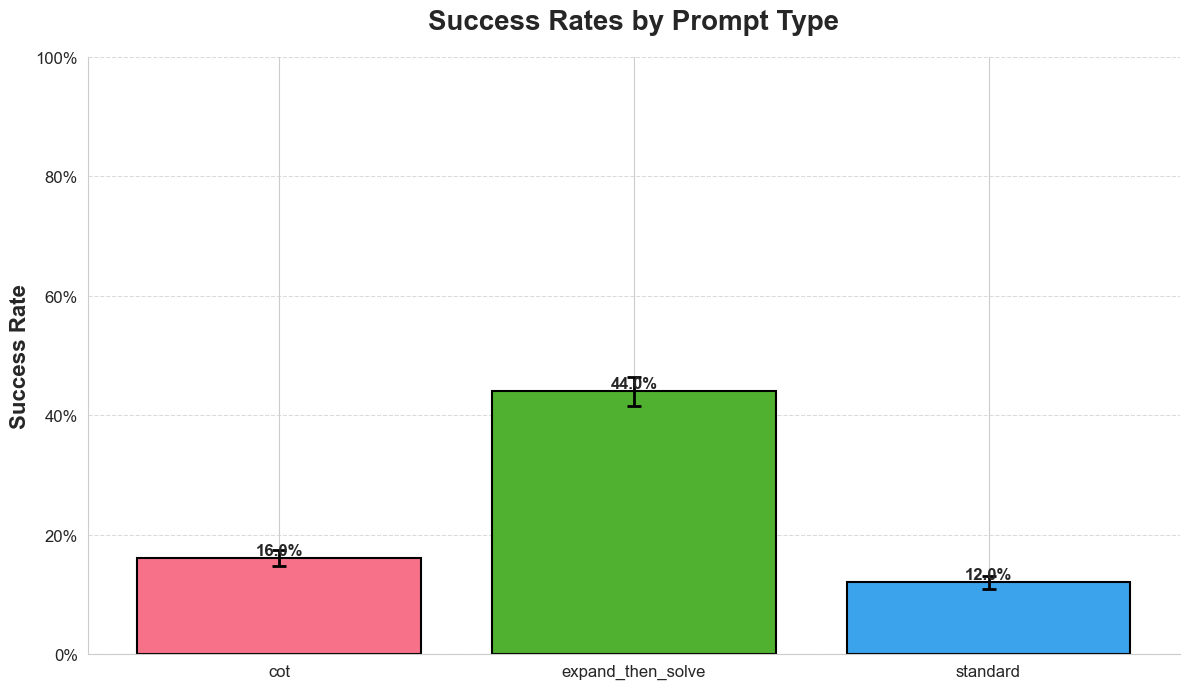

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for a more modern look
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bars
bars = ax.bar(success_rates.index, success_rates.values, 
              color=sns.color_palette("husl", 3),
              edgecolor='black', linewidth=1.5)

# Add error bars
error = success_rates * (1 - success_rates) / np.sqrt(100)
ax.errorbar(success_rates.index, success_rates.values, yerr=error, 
            fmt='none', ecolor='black', capsize=5, capthick=2, elinewidth=2)

# Customize the plot
ax.set_title('Success Rates by Prompt Type', fontsize=20, fontweight='bold', pad=20)
ax.set_ylabel('Success Rate', fontsize=16, fontweight='bold')
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Customize the tick labels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(success_rates.index, rotation=0, ha='center')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1%}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a subtle grid on the y-axis only
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()